# Load required libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(palette='Spectral')
from scipy import stats
import xlrd
import datetime
%matplotlib inline

In [2]:
purchase = pd.read_csv('data/QVI_purchase_behaviour.csv')
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
transaction = pd.read_excel('data/QVI_transaction_data.xlsx')
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Converting 'DATE' to date type

In [4]:
book = xlrd.open_workbook("data/QVI_transaction_data.xlsx")
datemode = book.datemode
transaction["DATE"].map(lambda x:xlrd.xldate_as_tuple(x, datemode))
transaction['DATE'] =  transaction["DATE"].map(lambda x:datetime.datetime(*xlrd.xldate_as_tuple(x,datemode)))

In [5]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [7]:
df = pd.merge(transaction,purchase)
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


# Data Manipulation

Removing Salsa products from dataframe

In [8]:
df.drop(df[df['PROD_NAME'].apply(lambda x: True if 'salsa' in x.lower().split() else False)].index,inplace=True)

Creating Size and Brand columns

In [9]:
df['SIZE'] = df['PROD_NAME'].apply(lambda x: x[-4:-1])
df['BRAND'] = df['PROD_NAME'].apply(lambda x: x.split(' ')[0])
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,WW
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths


Checking to see if there's any error in the created columns.

In [10]:
df['SIZE'].unique()

array(['175', '160', '170', '150', '165', '380', '330', '110', '210',
       '180', '200', '134', '270', '220', '125', ' 70', 'Sal', '250',
       ' 90', '190'], dtype=object)

See what products have been assigned as 'Sal'.

In [11]:
df[df['SIZE']=='Sal'].head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,SIZE,BRAND
101,2019-04-30,39,39167,35644,63,Kettle 135g Swt Pot Sea Salt,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Sal,Kettle
132,2018-11-23,45,45127,41120,63,Kettle 135g Swt Pot Sea Salt,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Sal,Kettle
152,2019-04-01,55,55072,48881,63,Kettle 135g Swt Pot Sea Salt,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Sal,Kettle


Apparently all the items assigned 'Sal' as their size need to be assigned 135.

In [12]:
df.loc[df['SIZE']=='Sal','SIZE'] = '135'

In [13]:
df['SIZE'].unique()

array(['175', '160', '170', '150', '165', '380', '330', '110', '210',
       '180', '200', '134', '270', '220', '125', ' 70', '135', '250',
       ' 90', '190'], dtype=object)

Checking if BRAND's column has any uncorrectly assings

In [14]:
df['BRAND'].unique()

array(['Natural', 'CCs', 'WW', 'Smiths', 'Kettle', 'Tyrrells', 'Dorito',
       'Doritos', 'Infuzions', 'Grain', 'Thins', 'Red', 'GrnWves',
       'Tostitos', 'Pringles', 'Cobs', 'Twisties', 'RRD', 'Infzns',
       'Burger', 'NCC', 'Cheezels', 'Smith', 'French', 'Sunbites',
       'Cheetos', 'Woolworths', 'Snbts'], dtype=object)

Apparently Dorito, Infzns, Red, and Snbts have been misassigned.

In [15]:
df.loc[df['BRAND']=='Dorito','BRAND'] = 'Doritos'
df.loc[df['BRAND']=='Snbts','BRAND'] = 'Sunbites'
df.loc[df['BRAND']=='Infzns','BRAND'] = 'Infuzions'
df.loc[df['BRAND']=='Red','BRAND'] = 'RRD'

In [16]:
df['BRAND'].unique()

array(['Natural', 'CCs', 'WW', 'Smiths', 'Kettle', 'Tyrrells', 'Doritos',
       'Infuzions', 'Grain', 'Thins', 'RRD', 'GrnWves', 'Tostitos',
       'Pringles', 'Cobs', 'Twisties', 'Burger', 'NCC', 'Cheezels',
       'Smith', 'French', 'Sunbites', 'Cheetos', 'Woolworths'],
      dtype=object)

Setting 'SIZE' column as integer.

In [17]:
df['SIZE'] = df['SIZE'].astype(int)

# Data Exploration

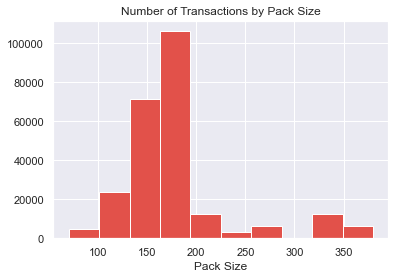

In [18]:
df.hist('SIZE')
plt.title("Number of Transactions by Pack Size")
plt.xlabel('Pack Size');

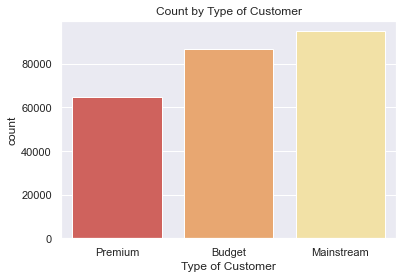

In [19]:
sns.countplot(data=df,x='PREMIUM_CUSTOMER')
plt.title("Count by Type of Customer")
plt.xlabel("Type of Customer");

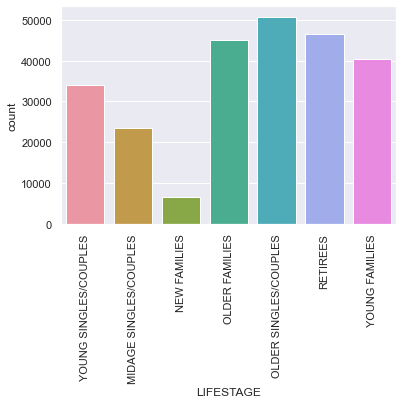

In [20]:
sns.countplot(data=df,x='LIFESTAGE')
plt.xticks(rotation=90);

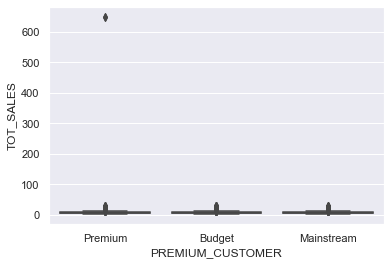

In [21]:
sns.boxplot(x="PREMIUM_CUSTOMER", y="TOT_SALES", data=df,palette='rainbow')

Checking who's the outlier.

In [22]:
df['TOT_SALES'].sort_values(ascending=False)

71457     650.0
71456     650.0
171914     29.5
5745       29.5
119732     29.5
          ...  
181600      1.7
18434       1.7
235438      1.7
80905       1.7
149351      1.7
Name: TOT_SALES, Length: 246742, dtype: float64

In [23]:
df.iloc[71456:71458]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,SIZE,BRAND
76786,2019-03-30,149,149089,148716,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,OLDER FAMILIES,Premium,150,Doritos
76787,2018-10-01,149,149120,148769,30,Doritos Corn Chips Cheese Supreme 170g,2,8.8,OLDER FAMILIES,Premium,170,Doritos


Removing the outliers.

In [24]:
df.drop(index=[71456,71457],inplace=True)

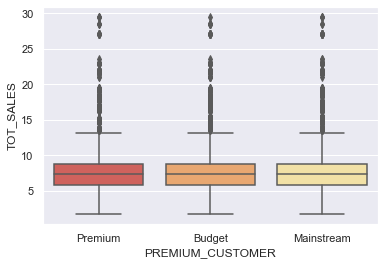

In [25]:
sns.boxplot(x="PREMIUM_CUSTOMER", y="TOT_SALES", data=df)

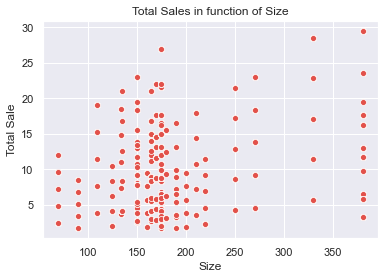

In [26]:
sns.scatterplot(data=df.sort_values(by='SIZE'),x='SIZE',y='TOT_SALES')
plt.title("Total Sales in function of Size")
plt.xlabel("Size")
plt.ylabel("Total Sale");

Saving dataframe for posterior analysis.

In [27]:
df.to_csv('data/QVI_dataframe',index=False)

# Data Analysis

#### Average total spent by type of customer

In [28]:
df.pivot_table('TOT_SALES','PREMIUM_CUSTOMER',aggfunc={'TOT_SALES': ['mean','count','sum']})

,count,mean,sum
PREMIUM_CUSTOMER,,,
Budget,86762,7.277458,631406.85
Mainstream,95043,7.374193,700865.40
Premium,64935,7.282751,472905.45


As expected Mainstream customers represent the majority of customers buying chips, followed by Budget customers. We can also see that, on average, beeing a Budget, Mainstream or Premium customer doesns't affect the value spent. Although Mainstream and Budget customers represent 74% of sales. 

#### Top 5 selling brands and their mean sale value

In [29]:
df.pivot_table('TOT_SALES','BRAND',aggfunc={'TOT_SALES': ['count','mean','sum']}).sort_values('count',ascending=False).head(5)

,count,mean,sum
BRAND,,,
Kettle,41288,9.451652,390239.8
Smiths,27390,7.408127,202908.6
Doritos,25224,8.972800,226329.9
Pringles,25102,7.077344,177655.5
RRD,16321,5.367778,87607.5


Kettle chips not only sells almost double the amount compared to the second highest selling brand, it also has a higher mean value spent.

#### Total sales by LIFESTAGE and PREMIUM_CUSTOMER

In [30]:
df.pivot_table('TOT_SALES',['LIFESTAGE','PREMIUM_CUSTOMER'],aggfunc={'TOT_SALES':['sum']}).sort_values('sum',ascending=False).head(3)

,,sum
LIFESTAGE,PREMIUM_CUSTOMER,
OLDER FAMILIES,Budget,156863.75
YOUNG SINGLES/COUPLES,Mainstream,147582.20
RETIREES,Mainstream,145168.95


Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees.

#### Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

In [31]:
df.pivot_table('TOT_SALES',['LIFESTAGE','PREMIUM_CUSTOMER'],aggfunc={'TOT_SALES':['count']}).sort_values('count',ascending=False).head(3)

,,count
LIFESTAGE,PREMIUM_CUSTOMER,
OLDER FAMILIES,Budget,21514
RETIREES,Mainstream,19970
YOUNG SINGLES/COUPLES,Mainstream,19544


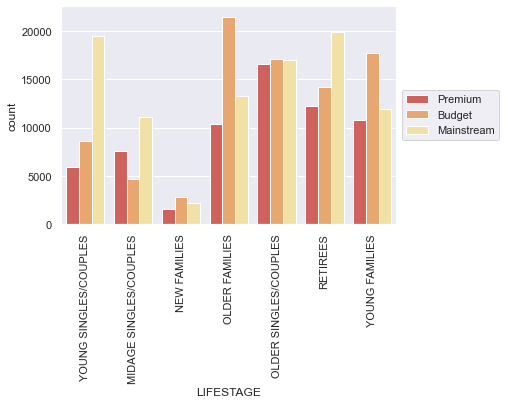

In [32]:
sns.countplot(data=df,x='LIFESTAGE',hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

#### Average number of units bought per customer

In [33]:
df.pivot_table('PROD_QTY',['LIFESTAGE','PREMIUM_CUSTOMER'],aggfunc={'PROD_QTY':['mean']}).sort_values('mean',ascending=False).head(6)

mean
LIFESTAGE      PREMIUM_CUSTOMER          
OLDER FAMILIES Mainstream        1.948795
               Premium           1.945496
               Budget            1.945384
YOUNG FAMILIES Mainstream        1.941408
               Budget            1.941226
               Premium           1.938149

Older and young families in general buy more chips per customer.

#### Average price per unit chips bought for each customer

In [34]:
df.pivot_table('TOT_SALES',['LIFESTAGE','PREMIUM_CUSTOMER'],aggfunc={'TOT_SALES':['mean','count']}).sort_values('mean',ascending=False)

,,count,mean
LIFESTAGE,PREMIUM_CUSTOMER,,
MIDAGE SINGLES/COUPLES,Mainstream,11095,7.637156
YOUNG SINGLES/COUPLES,Mainstream,19544,7.551279
RETIREES,Premium,12236,7.461315
OLDER SINGLES/COUPLES,Premium,16560,7.459997
RETIREES,Budget,14225,7.445786
OLDER SINGLES/COUPLES,Budget,17172,7.444305
NEW FAMILIES,Mainstream,2185,7.313364
OLDER SINGLES/COUPLES,Mainstream,17061,7.306049
YOUNG FAMILIES,Budget,17763,7.302705


Mainstream - midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks. As the difference in average price per unit isn't large, we can check if this difference is statistically different.

#### T-test statistics

In [35]:
stats.ttest_ind(df[((df['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')|(df['LIFESTAGE']=='YOUNG SINGLES/COUPLES'))&(df['PREMIUM_CUSTOMER']=='Mainstream')]['TOT_SALES'],\
                df[((df['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')|(df['LIFESTAGE']=='YOUNG SINGLES/COUPLES'))&(df['PREMIUM_CUSTOMER']!='Mainstream')]['TOT_SALES'])

Ttest_indResult(statistic=33.200521751400665, pvalue=1.9916804791067727e-239)

As we can see from all the p-values  the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

## Deeper dive into highest spender on average, the Mainstream - midage singles/couples.

In [36]:
midage_main = df[(df['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')&(df['PREMIUM_CUSTOMER']=='Mainstream')]
other = df.drop(df[(df['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')&(df['PREMIUM_CUSTOMER']=='Mainstream')].index)

#### Target audience's preferred brand

In [37]:
midage_main.groupby('BRAND')['PROD_QTY'].count().sort_values(ascending=False).head(3)

BRAND
Kettle     2136
Doritos    1210
Smiths     1176
Name: PROD_QTY, dtype: int64

Our target's top 3 brands of chip are the same as our total customers the only diferrence being that our target prefers Doritos over Smiths.

#### Performing an affinity analysis on the brand

In [38]:
qty_segment1 = midage_main['PROD_QTY'].sum()
qty_segment2 = other['PROD_QTY'].sum()
qty_seg_1_by_brand = midage_main.groupby('BRAND').sum()['PROD_QTY'] / qty_segment1
qty_seg_2_by_brand = other.groupby('BRAND').sum()['PROD_QTY'] / qty_segment2
brand_affinity = pd.merge(qty_seg_1_by_brand,qty_seg_2_by_brand,suffixes=('_target','_other'),on='BRAND')
brand_affinity['AFFINITY'] = brand_affinity['PROD_QTY_target'] / brand_affinity['PROD_QTY_other']
brand_affinity.sort_values(by='AFFINITY',ascending=False)

,PROD_QTY_target,PROD_QTY_other,AFFINITY
BRAND,,,
Kettle,0.192571,0.166893,1.153857
Twisties,0.043935,0.038260,1.148326
Cobs,0.044831,0.039227,1.142875
Tostitos,0.043558,0.038314,1.136882
Grain,0.027719,0.025321,1.094683
Infuzions,0.061755,0.057457,1.074792
Cheezels,0.019846,0.018536,1.070705
Doritos,0.108895,0.102454,1.062870
Tyrrells,0.026917,0.026107,1.031035


In a more in-deepth look into our target preferency's we notice that they're 15% more likely to purchase Kettle chips and 50% less likely to purchase Sunbites compared to the rest of the population.

#### Target audience's preferred size of chips

In [39]:
midage_main.groupby('SIZE')['PROD_QTY'].count().sort_values(ascending=False).head(3)

SIZE
175    2975
150    1777
134    1159
Name: PROD_QTY, dtype: int64

In [40]:
other.groupby('SIZE')['PROD_QTY'].count().sort_values(ascending=False).head(3)

SIZE
175    63415
150    38426
134    23943
Name: PROD_QTY, dtype: int64

Our targeted segment preferred size of chips doesn't seem to differ from the rest of the customers.

#### Perfoming an affinity analysis on the size of chips

In [41]:
qty_seg_1_by_size = midage_main.groupby('SIZE').sum()['PROD_QTY'] / qty_segment1
qty_seg_2_by_size = other.groupby('SIZE').sum()['PROD_QTY'] / qty_segment2
brand_affinity = pd.merge(qty_seg_1_by_size,qty_seg_2_by_size,suffixes=('_target','_other'),on='SIZE')
brand_affinity['AFFINITY'] = brand_affinity['PROD_QTY_target'] / brand_affinity['PROD_QTY_other']
brand_affinity.sort_values(by='AFFINITY',ascending=False)

,PROD_QTY_target,PROD_QTY_other,AFFINITY
SIZE,,,
270,0.030736,0.025373,1.211382
330,0.059728,0.050607,1.180220
110,0.102060,0.090542,1.127218
135,0.014519,0.013144,1.104660
210,0.027719,0.025321,1.094683
380,0.028426,0.025980,1.094134
250,0.013199,0.012888,1.024185
134,0.104181,0.101982,1.021564
175,0.268562,0.268864,0.998875


As it seems  Mainstream midage singles/couples are 21% more likely to purchase a 270g pack of chips compared to the rest of the population and 50% less likely to purchase a 90g pack compared to the rest of the population.